## Tensorflow로 Augmentation하기

```
pip install pillow
```

```
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/mycat.jpg
$ mv mycat.jpg ~/aiffel/data_augmentation/images
```


In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel/aiffel/data_augmentation/images/mycat.jpg'

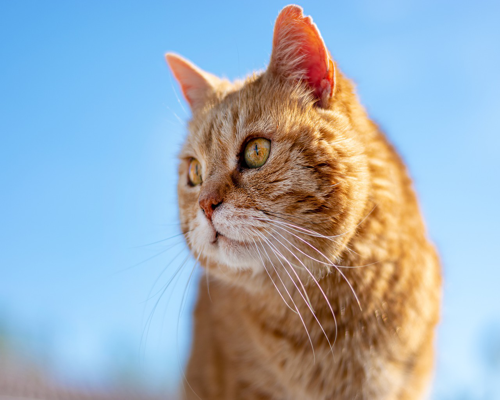

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip

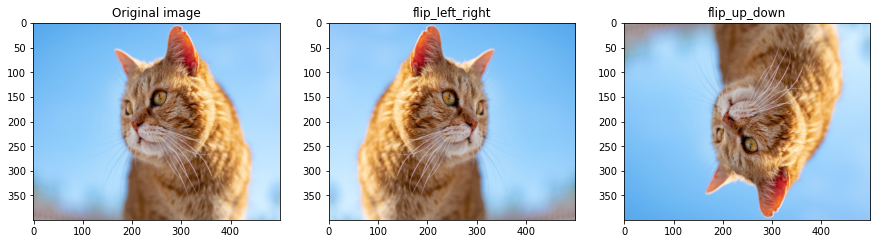

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

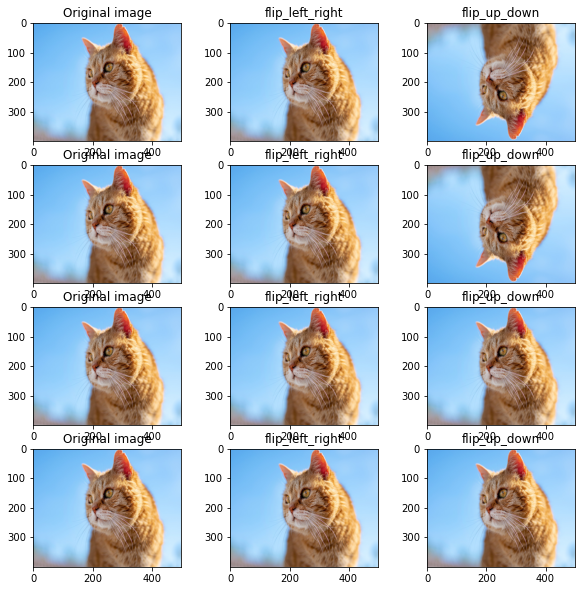

In [4]:
plt.figure(figsize=(10, 10))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## Crop 

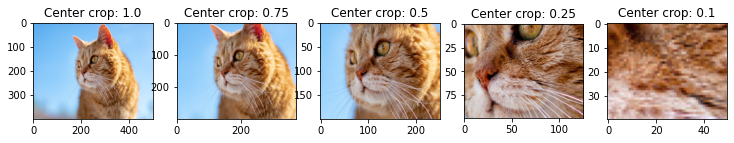

In [5]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [6]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

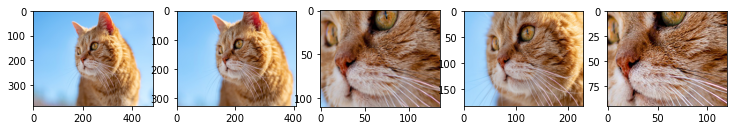

In [7]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

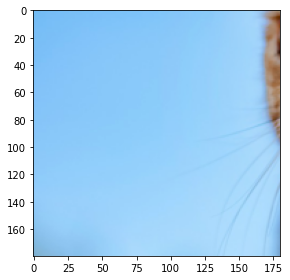

In [9]:
# apply random_crop on cat image
# 여기에 코드를 입력해 주세요.
plt.figure(figsize=(15, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

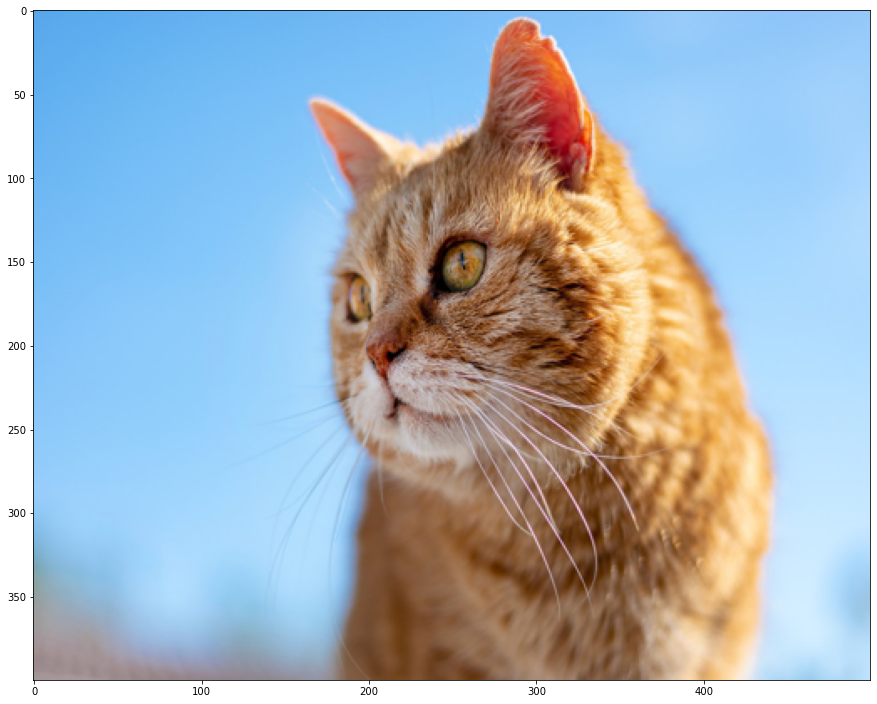

In [47]:
# apply random_brightness on cat image
# 여기에 코드를 입력해 주세요.
plt.figure(figsize=(15,15))

random_brightness_tensor = tf.image.random_brightness(image_tensor,255)
random_brightness_image = tf.keras.preprocessing.image.array_to_img(random_brightness_tensor)

plt.imshow(random_brightness_image)

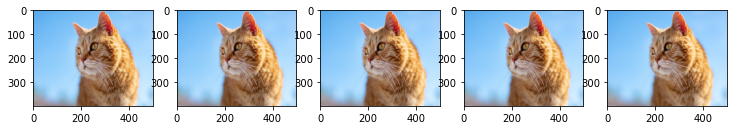

In [50]:
plt.figure(figsize=(15, 15))

col = 5
for i in range(5):
    random_brightness_tensor = tf.image.random_brightness(image_tensor, max_delta=0.5)
    random_brightness_image = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_brightness_image)

## imgaug 라이브러리 사용하기

```
$ pip install -q imgaug
```



In [54]:
!pip install -q imgaug

In [55]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

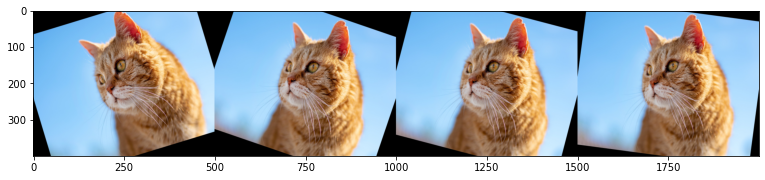

In [56]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

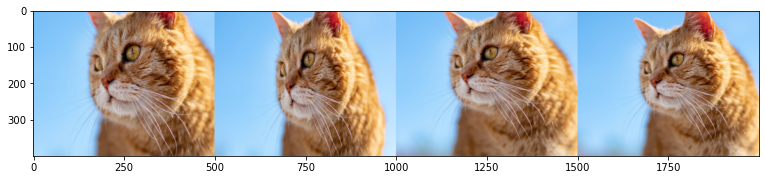

In [57]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

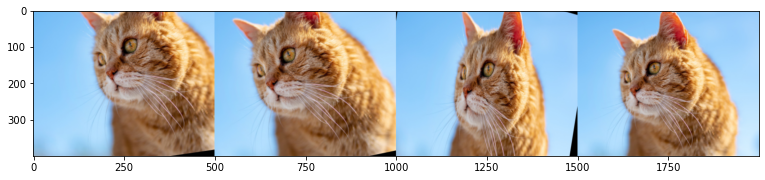

In [58]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

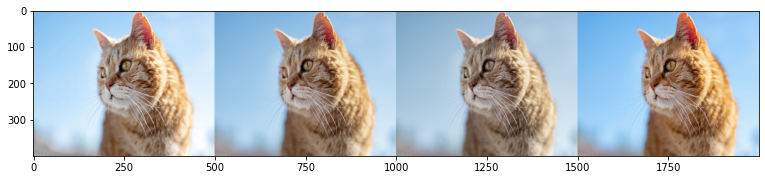

In [60]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

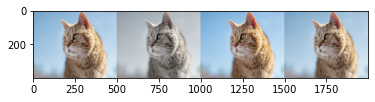

In [61]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.Sometimes(
         0.5,
         iaa.AddToSaturation((-50, 50))
     )
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))

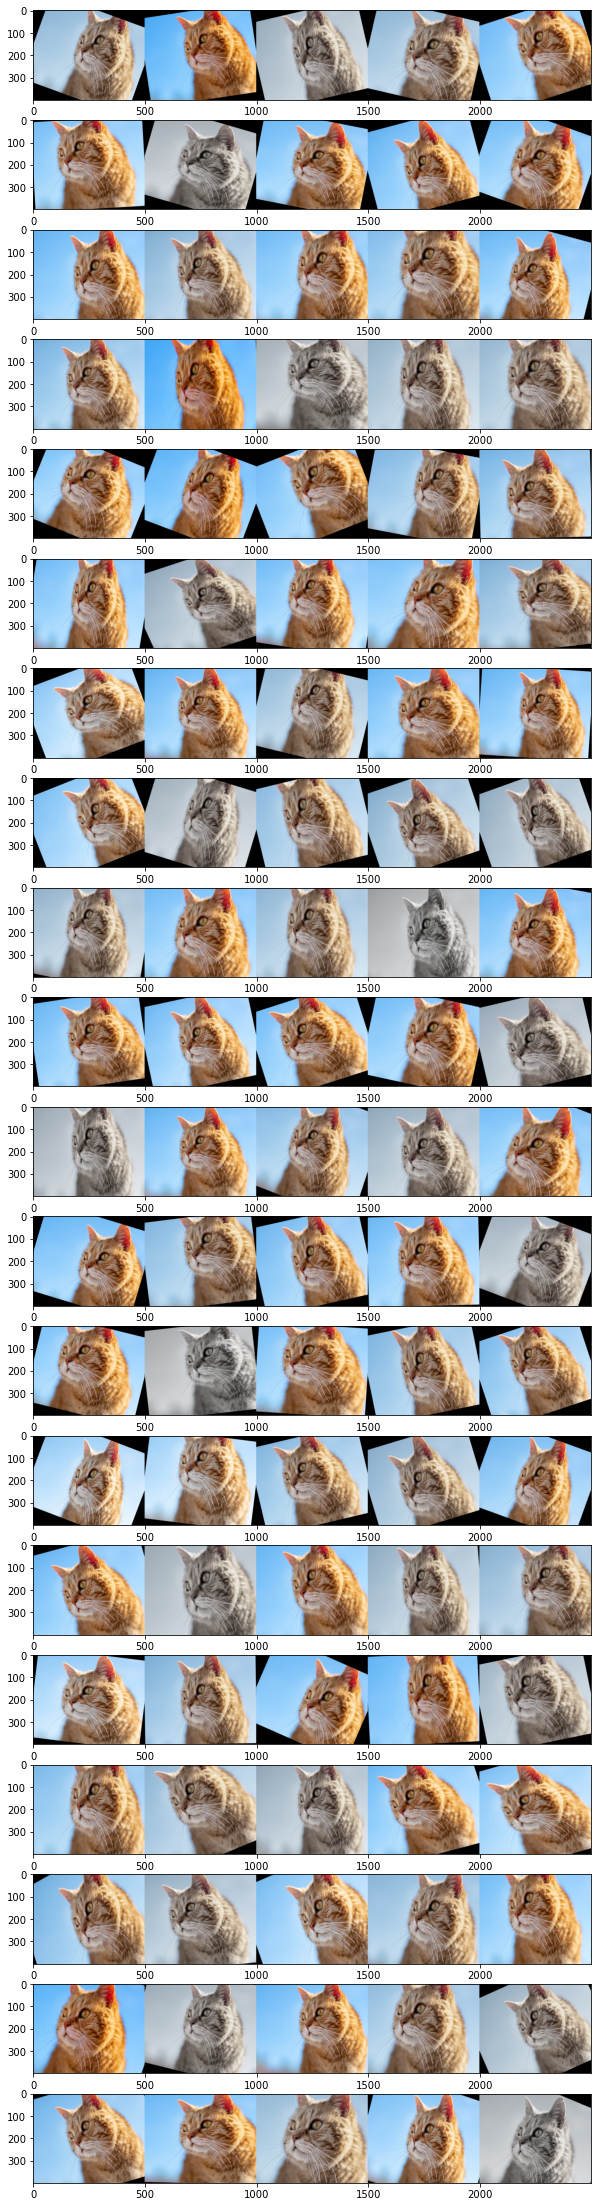

In [62]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()